# Optional Lab: Linear Regression using Scikit-Learn

There is an open-source, commercially usable machine learning toolkit called [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many of the algorithms that you will work with in this course.



## Goals
In this lab you will:
- Utilize  scikit-learn to implement linear regression using Gradient Descent

## Tools
You will utilize functions from scikit-learn as well as matplotlib and NumPy. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import linear model from sci-kit learn
# SGD stands for Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor

# this used for feature scalling by computing the z score (x-mean)/sigma
# also called as standard score, StandardScaler
from sklearn.preprocessing import StandardScaler

# this method will load the house dataset
from lab_utils_multi import  load_house_data


# this will import color dictionary
from lab_utils_common import dlc

# set the precision of numpy
np.set_printoptions(precision=2)

# choosing stylesheet for matplot
plt.style.use('./deeplearning.mplstyle')

# Gradient Descent
Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like your previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

### Load the data set

In [2]:
# this will load the dataset from the lab files
X_train, y_train = load_house_data()

# this will set the features names, for each column
X_features = ['size(sqft)','bedrooms','floors','age']

### Scale/normalize the training data

In [3]:
# creates a new instance of the z-score scaler
scaler = StandardScaler()


# this line will transform the dataset into a standardized data/ scaled dataset
X_norm = scaler.fit_transform(X_train)

# in the raw dataset the features can be seen as very large peek to peek (max-min)  (1.00e+00 -> 9.50e+01)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")


# in the normalized dataset the features can be seen as smaller peek to peek (max-min) (2 -> 6)
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

StandardScaler()
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


### Create and fit the regression model

In [10]:
# this will create new instance of the Stochastic Gradient Descent method
# the number of iterations will 1000
# i cann also choose alpha, and other params
sgdr = SGDRegressor(max_iter=1000)


# this will start fitting, training by the normalized dataset
sgdr.fit(X_norm, y_train)
print(sgdr)


print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 136, number of weight updates: 13465.0


### View parameters
Note, the parameters are associated with the *normalized* input data. The fit parameters are very close to those found in the previous lab with this data.

In [14]:
# this will show the b, bias, intercept
b_norm = sgdr.intercept_

# this will show the W, weights, coeffcients
w_norm = sgdr.coef_


# this will comprate the parameters found from sci-kit learn compared to the previous lab which was done manually
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b:[363.16]")

model parameters:                   w: [110.28 -21.12 -32.53 -38.04], b:[363.14]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b:[363.16]


### Make predictions
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.

In [21]:
# make a prediction using sgdr.predict()
# the W (weights) on this model instance were found using the sgdr.fit(X_norm, y_train)
# the dataset will be of shape (99,)
# predcition with existing .predict() method
y_pred_sgd = sgdr.predict(X_norm)


# make a prediction using w,b.
# using dot product of x_norm * w_norm + b_norm
# prediction with f_wb(X)
y_pred = np.dot(X_norm, w_norm) + b_norm  


# this will compare if the 2 prediction results match in size
# which they match 100% in all elements
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")


# comparing the predictions with the original dataset target values
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.13 485.97 389.59 492.13]
Target values 
[300.  509.8 394.  540. ]


### Plot Results
Let's plot the predictions versus the target values.

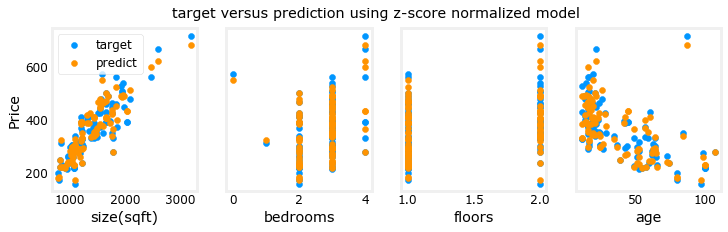

In [16]:
# plot predictions and targets vs original features
# will create a plot with 4 subplots in 1 row, and they will share y-axis
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)

# will loop over the subplot
for i in range(len(ax)):

    # will create a scatter plot representing the actual target value with all rows for each column in the x-axis,
    # and for the y-axis it will have the y-train
    # the color will be blue
    ax[i].scatter(X_train[:,i],y_train, label = 'target')

    # the x label will take from X_features list
    ax[i].set_xlabel(X_features[i])


    # another scatter plot will be created to represnet the predicted target values with all the rows for each column in the x-axis,
    # for y-axis it will have the predictions
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')


# this will set the y label "price" for the entire plot
ax[0].set_ylabel("Price"); ax[0].legend();

# adding subtitle
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

## Congratulations!
In this lab you:
- utilized an open-source machine learning toolkit, scikit-learn
- implemented linear regression using gradient descent and feature normalization from that toolkit